In [9]:
import numpy as np
data = np.loadtxt('heart.dat', unpack = True)
data

array([[70., 67., 57., ..., 56., 57., 67.],
       [ 1.,  0.,  1., ...,  0.,  1.,  1.],
       [ 4.,  3.,  2., ...,  2.,  4.,  4.],
       ...,
       [ 3.,  0.,  0., ...,  0.,  0.,  3.],
       [ 3.,  7.,  7., ...,  3.,  6.,  3.],
       [ 2.,  1.,  2., ...,  1.,  1.,  2.]])

In [10]:
data.shape

(14, 270)

In [13]:
# rename columns
df = pd.DataFrame(data).T
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg'
               ,'thalach','exang','oldpeak','slope','ca','thal'
               ,'num']

## Start of Kaggle notebook
https://www.kaggle.com/code/asimislam/heart-disease-uci-eda-and-ml-w-lr/notebook

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import os

In [15]:
df.shape

(270, 14)

In [19]:
df = pd.read_csv('heart.csv')

In [21]:
df.shape

(303, 14)

# 2. Data Preparation
### 2.1 Check for NULLs/Duplicates

In [22]:
#  check for NULL values
print('\n--- NULL count ---\n{}'.format(df.isnull().sum()))
#df.dropna(inplace=True)             #  drop NULLs

#  check for DUPLICATES
print('\n1st DUPLICATE count:\t{}'.format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)  #  drop duplitcates
print('2nd DUPLICATE count:\t{}'.format(df.duplicated().sum()))


--- NULL count ---
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

1st DUPLICATE count:	1
2nd DUPLICATE count:	0


### 2.2 Feature Engineering

In [25]:
# renaming to understandable columns
df.rename(columns={
        'cp':'chest_pain_type', 'trestbps':'resting_blood_pressure',
        'chol':'cholestoral','fbs':'fasting_blood_sugar',
        'restecg':'resting_electrocardiographic','thalach':'maximum_heart_rate',
        'exang':'exercise_induced_angina','oldpeak':'ST_depression',
        'slope':'slope_peak_exercise_ST','ca':'number_of_major_vessels'},
    inplace=True)

print(df.columns.tolist())

['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'resting_electrocardiographic', 'maximum_heart_rate', 'exercise_induced_angina', 'ST_depression', 'slope_peak_exercise_ST', 'number_of_major_vessels', 'thal', 'target']


In [26]:
# renaming to readable values
df['sex'] = df['sex'].map({0:'female', 1:'male'})
df['chest_pain_type'] = df['chest_pain_type'].map({
        0:'typical angina', 1:'atypical angina',
        2:'non-anginal',    3:'asymptomatic'})
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].map({
        0:'> 120 mg/dl', 1:'< 120 mg/dl'})
df['resting_electrocardiographic'] = df['resting_electrocardiographic'].map({
        0:'normal', 1:'ST-T wave abnormality', 2:'ventricular hypertrophy'})
df['exercise_induced_angina'] = df['exercise_induced_angina'].map({
        0:'no', 1:'yes'})
df['slope_peak_exercise_ST'] = df['slope_peak_exercise_ST'].map({
        0:'upsloping', 1:'flat', 2:'downsloping'})
df['thal'] = df['thal'].map({
        0:'normal 0',     1:'normal 1',
        2:'fixed defect', 3:'reversable defect'})
df['target'] = df['target'].map({0:'no disease', 1:'disease'})

df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_electrocardiographic,maximum_heart_rate,exercise_induced_angina,ST_depression,slope_peak_exercise_ST,number_of_major_vessels,thal,target
0,63,male,asymptomatic,145,233,< 120 mg/dl,normal,150,no,2.3,upsloping,0,normal 1,disease
1,37,male,non-anginal,130,250,> 120 mg/dl,ST-T wave abnormality,187,no,3.5,upsloping,0,fixed defect,disease
2,41,female,atypical angina,130,204,> 120 mg/dl,normal,172,no,1.4,downsloping,0,fixed defect,disease
3,56,male,atypical angina,120,236,> 120 mg/dl,ST-T wave abnormality,178,no,0.8,downsloping,0,fixed defect,disease
4,57,female,typical angina,120,354,> 120 mg/dl,ST-T wave abnormality,163,yes,0.6,downsloping,0,fixed defect,disease


# 3. Understanding the Data
### 3.1 Data Types

In [27]:
print(df.info())         #  dataset size and types
print('\nData Shape:  {}'.format(df.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           302 non-null    int64  
 1   sex                           302 non-null    object 
 2   chest_pain_type               302 non-null    object 
 3   resting_blood_pressure        302 non-null    int64  
 4   cholestoral                   302 non-null    int64  
 5   fasting_blood_sugar           302 non-null    object 
 6   resting_electrocardiographic  302 non-null    object 
 7   maximum_heart_rate            302 non-null    int64  
 8   exercise_induced_angina       302 non-null    object 
 9   ST_depression                 302 non-null    float64
 10  slope_peak_exercise_ST        302 non-null    object 
 11  number_of_major_vessels       302 non-null    int64  
 12  thal                          302 non-null    object 
 13  targe

### 3.2 Statistical Summary

In [28]:
df.describe()

,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,number_of_major_vessels
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046,0.718543
std,9.04797,17.563394,51.753489,22.903527,1.161452,1.006748
min,29.00000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000,0.000000
75%,61.00000,140.000000,274.750000,166.000000,1.600000,1.000000
max,77.00000,200.000000,564.000000,202.000000,6.200000,4.000000


In [30]:
df.describe(include=['O'])

,sex,chest_pain_type,fasting_blood_sugar,resting_electrocardiographic,exercise_induced_angina,slope_peak_exercise_ST,thal,target
count,302,302,302,302,302,302,302,302
unique,2,4,2,3,2,3,4,2
top,male,typical angina,> 120 mg/dl,ST-T wave abnormality,no,downsloping,fixed defect,disease
freq,206,143,257,151,203,141,165,164


### 3.3 Types of Data
Separate out the Categoral and Numeric Data

In [31]:
#  Separate out Categorical and Numeric data
colCAT = []
colNUM = []
for i in df.columns:
    if (len(df[i].unique())) > 5:
        colNUM.append(i)
    else:
        colCAT.append(i)
    print('unique values:  {}\t{}'.format(len(df[i].unique()),i))

dataCAT = df[colCAT]     #  Categorical columns
colNUM.append('target')  #  add target column to Numeric
dataNUM = df[colNUM]     #  Numeric columns

unique values:  41	age
unique values:  2	sex
unique values:  4	chest_pain_type
unique values:  49	resting_blood_pressure
unique values:  152	cholestoral
unique values:  2	fasting_blood_sugar
unique values:  3	resting_electrocardiographic
unique values:  91	maximum_heart_rate
unique values:  2	exercise_induced_angina
unique values:  40	ST_depression
unique values:  3	slope_peak_exercise_ST
unique values:  5	number_of_major_vessels
unique values:  4	thal
unique values:  2	target


# 4. Exploratory Data Analysis
### 4.1 Plots - Categorical Data

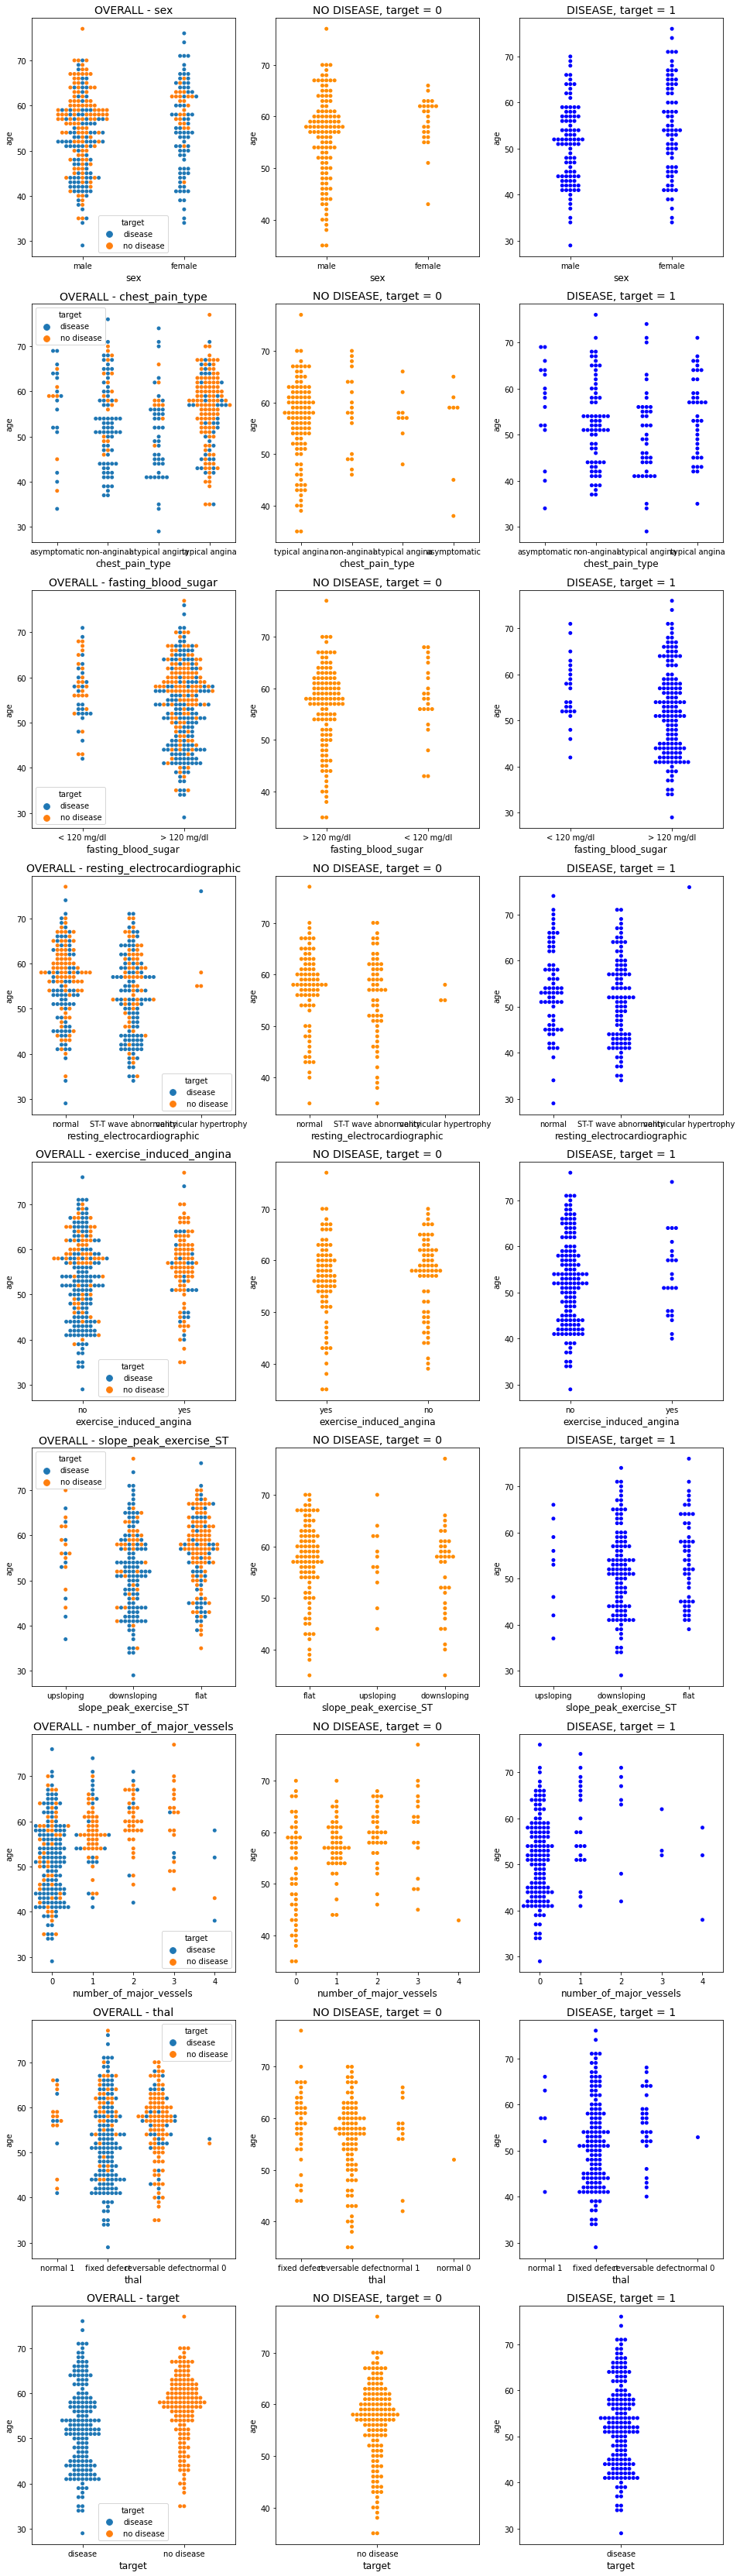

In [32]:
diseaseCAT    = df[(df['target'] == 'disease')]
no_diseaseCAT = df[(df['target'] == 'no disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataCAT.columns)
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,60))

for i in colCAT:
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL - {}'.format(i), fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=df, x=df[i],y=df.age,hue=df.target)
    subPlotNum = subPlotNum + 1
    # no_diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.swarmplot(data=no_diseaseCAT, x=no_diseaseCAT[i],y=no_diseaseCAT.age,color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseCAT
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    #sns.countplot(diseaseCAT[i], hue=df.sex)#,color='darkred')
    sns.swarmplot(data=diseaseCAT, x=diseaseCAT[i],y=diseaseCAT.age,color='blue')
    subPlotNum = subPlotNum + 1
plt.show()

##### Observations:
- **sex:** data has more male population with no heart disease than female; however, the population of patients with heart disease is almost the same, with the female population spread over a longer age range.
- **chest_pain_type**: typical angina accounts for most cases with no heart disease. Populations with anything other than typical angina have a higher chance of having heart disease.
- **fasting_blood_sugar:** is not a good indicator of heart disease since heathly and unhealthy population distribution is almost the same.
- **resting_electrocardiographic:** is not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same.
- **exercise_induced_angina:** is not a good indicator of heart disease since healthy and unhealthy population distribution is almost the same.
- **slope_peak_exercise_ST:** populations with downsloping and flat sloping have a higher incidence of heart disease.
- **number_of_major_vessels:** patients with no vessels colored by fluroscopy have a higher incidence of heart disease.
- **thal:** patients with fixed defect have a significantly higher incidence of heart disease.

### 4.2 Plots - Numerical Data

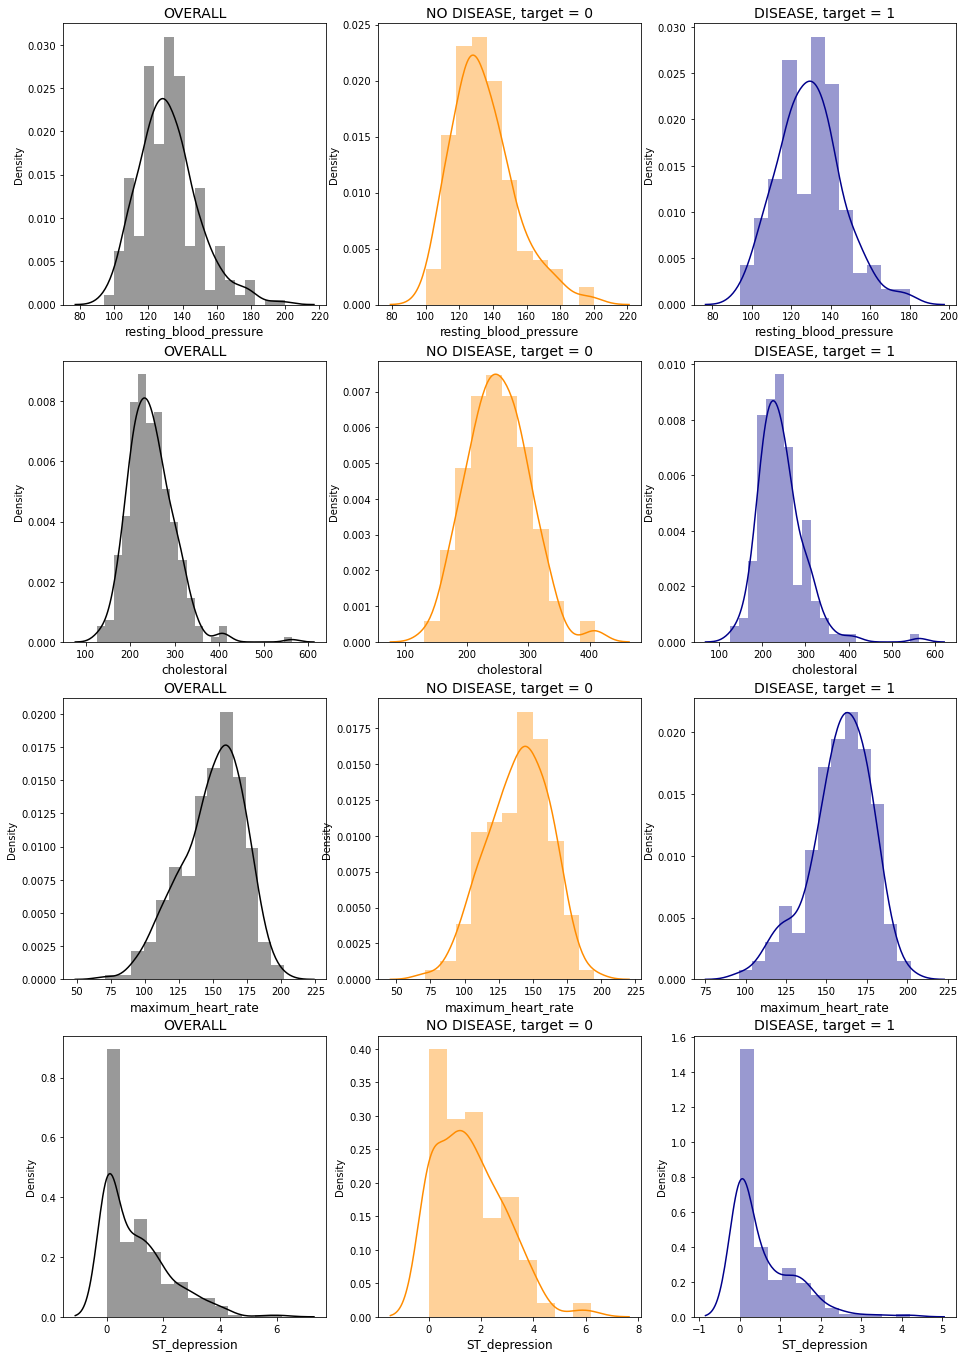

In [33]:
#  assign NUM dataframe for "no disease" and "disease"
no_diseaseNUM = dataNUM[(df['target'] == 'no disease')]
diseaseNUM    = dataNUM[(df['target'] == 'disease')]

#  fig.add_subplot([# of rows] by [# of columns] by [plot#])
subNumOfRow = len(dataNUM.columns)-1   #  x='age' in plots, drop column
subNumOfCol = 3     # three columns: overall, no disease, disease
subPlotNum  = 1     # initialize plot number

fig = plt.figure(figsize=(16,30))

for i in dataNUM.columns.drop(["age","target"]):
    # overall
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('OVERALL', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(df[i],color='black')
    subPlotNum = subPlotNum + 1
    # no_diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('NO DISEASE, target = 0', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(no_diseaseNUM[i],color='darkorange')
    subPlotNum = subPlotNum + 1
    # diseaseNUM
    fig.add_subplot(subNumOfRow, subNumOfCol, subPlotNum)
    plt.title('DISEASE, target = 1', fontsize=14)
    plt.xlabel(i, fontsize=12)
    sns.distplot(diseaseNUM[i],color='darkblue')
    subPlotNum = subPlotNum + 1

plt.show()

##### Observations:
- There are no discernsible patterns from the plots between blood pressure, cholesterol, max heartbeat, ST depression and heart disease with respect to age and sex.

# 5. Model - Logistic Regression
### 5.1 One Hot Encoding

In [34]:
#  one hot encoding works on type 'object'
for i in colCAT:
    df[i] = df[i].astype(object)
    
df_OHE = df[colCAT]               #  dataframe with categorical values
df_OHE = pd.get_dummies(df_OHE)   #  one-hot encoding
df_OHE = df_OHE.join(df[colNUM])  #  add numeric columns

#  change target data to 0/1
df_OHE['target'] = df_OHE['target'].map({'no disease':0,'disease':1})
df_OHE = df_OHE.drop(['target_disease', 'target_no disease'], axis=1)

df_OHE.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0,1,1,0,0,0,1,0,0,1,...,0,0,1,0,63,145,233,150,2.3,1
1,0,1,0,0,1,0,0,1,1,0,...,1,0,0,0,37,130,250,187,3.5,1
2,1,0,0,1,0,0,0,1,0,1,...,1,0,0,0,41,130,204,172,1.4,1
3,0,1,0,1,0,0,0,1,1,0,...,1,0,0,0,56,120,236,178,0.8,1
4,1,0,0,0,0,1,0,1,1,0,...,1,0,0,0,57,120,354,163,0.6,1


### 5.2 Normalize Data

In [35]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit_transform(df_OHE)
norm[0:2]

array([[0.        , 1.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.70833333, 0.48113208, 0.24429224, 0.60305344, 0.37096774,
        1.        ],
       [0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.16666667, 0.33962264, 0.28310502, 0.88549618, 0.56451613,
        1.        ]])

In [36]:
#  dataframe with the One Hot Encoding and Normalized data
df = pd.DataFrame(norm, index=df_OHE.index, columns=df_OHE.columns)
df.head()

,sex_female,sex_male,chest_pain_type_asymptomatic,chest_pain_type_atypical angina,chest_pain_type_non-anginal,chest_pain_type_typical angina,fasting_blood_sugar_< 120 mg/dl,fasting_blood_sugar_> 120 mg/dl,resting_electrocardiographic_ST-T wave abnormality,resting_electrocardiographic_normal,...,thal_fixed defect,thal_normal 0,thal_normal 1,thal_reversable defect,age,resting_blood_pressure,cholestoral,maximum_heart_rate,ST_depression,target
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.708333,0.481132,0.244292,0.603053,0.370968,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.166667,0.339623,0.283105,0.885496,0.564516,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.250000,0.339623,0.178082,0.770992,0.225806,1.0
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.562500,0.245283,0.251142,0.816794,0.129032,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.583333,0.245283,0.520548,0.702290,0.096774,1.0


### 5.3 Correlation

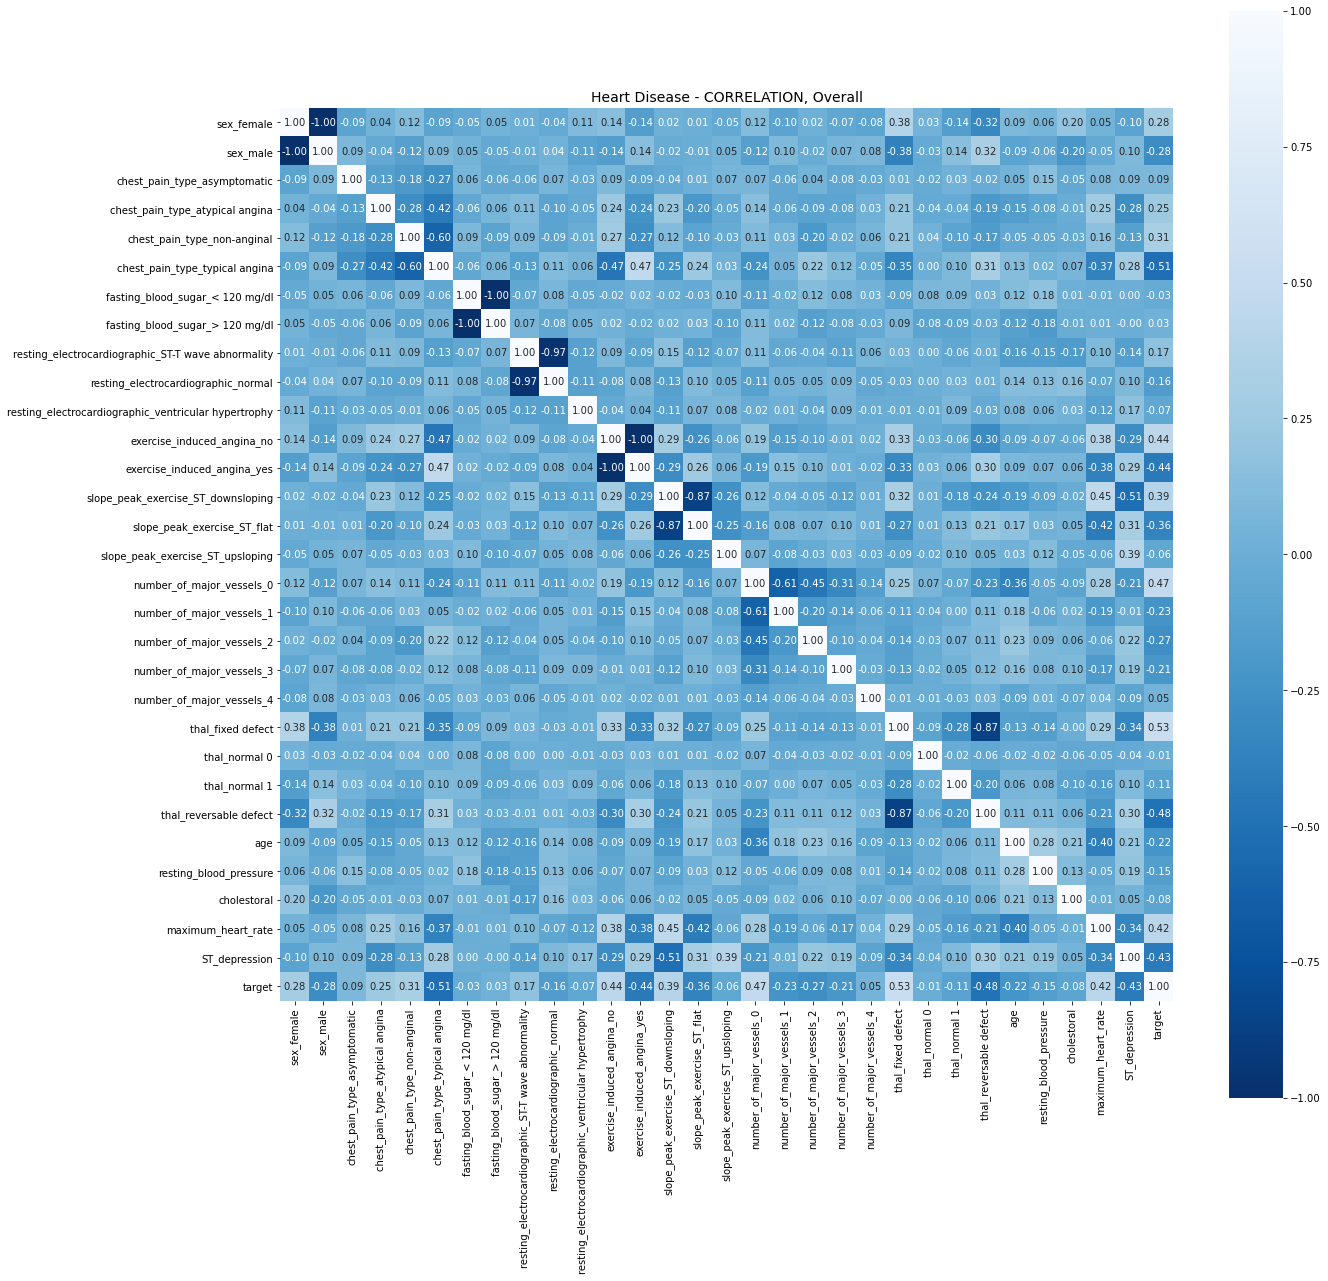

In [37]:
dataCorr = df.corr()
plt.figure(figsize=(20,20))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'Blues_r')

In [38]:
corrALL = dataCorr['target'].sort_values(ascending=False)
corrALL = corrALL.drop(['target'])
corrALL.to_frame()

,target
thal_fixed defect,0.526030
number_of_major_vessels_0,0.470849
exercise_induced_angina_no,0.435601
maximum_heart_rate,0.419955
slope_peak_exercise_ST_downsloping,0.392121
chest_pain_type_non-anginal,0.313696
sex_female,0.283609
chest_pain_type_atypical angina,0.247649
resting_electrocardiographic_ST-T wave abnormality,0.172827
chest_pain_type_asymptomatic,0.087959


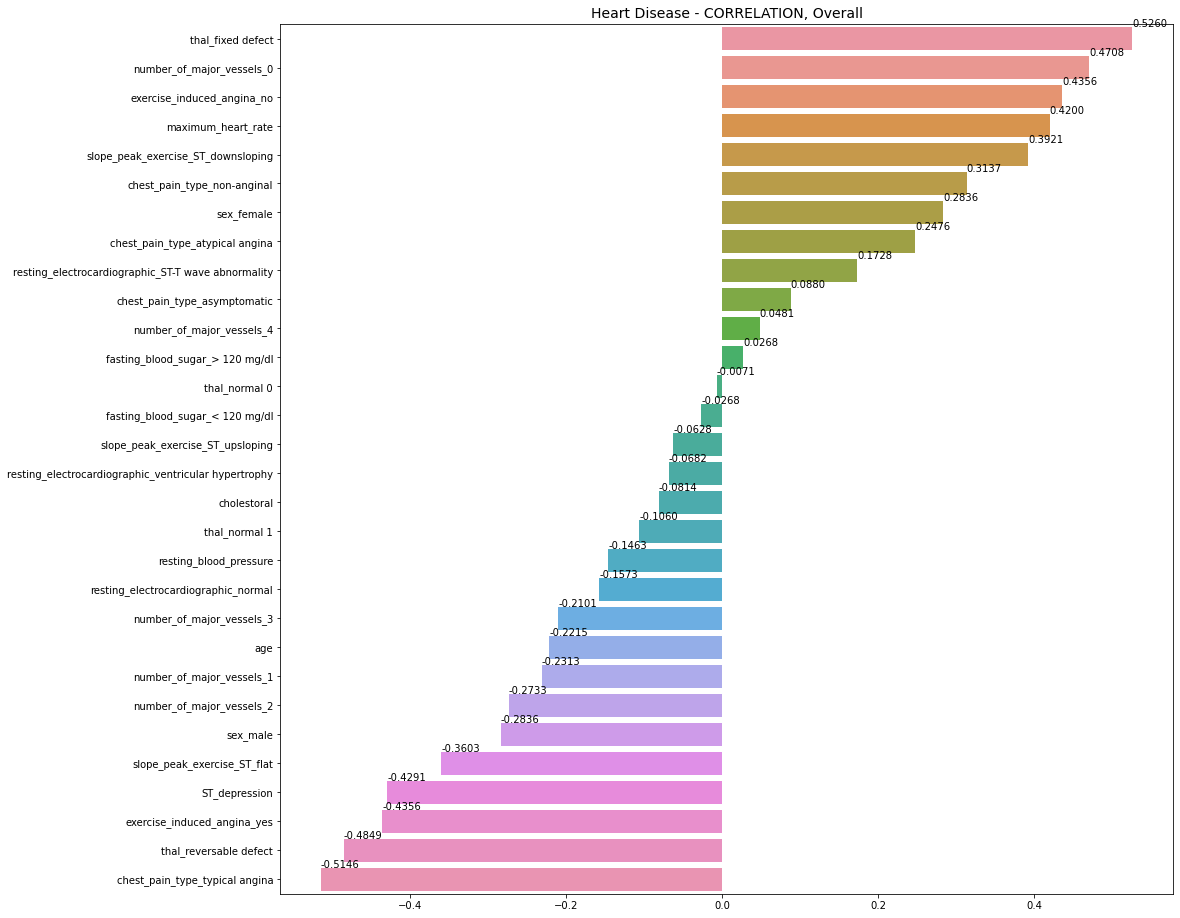

In [40]:
plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Overall', fontsize=14)
ax = sns.barplot(y=corrALL.index,x=corrALL.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

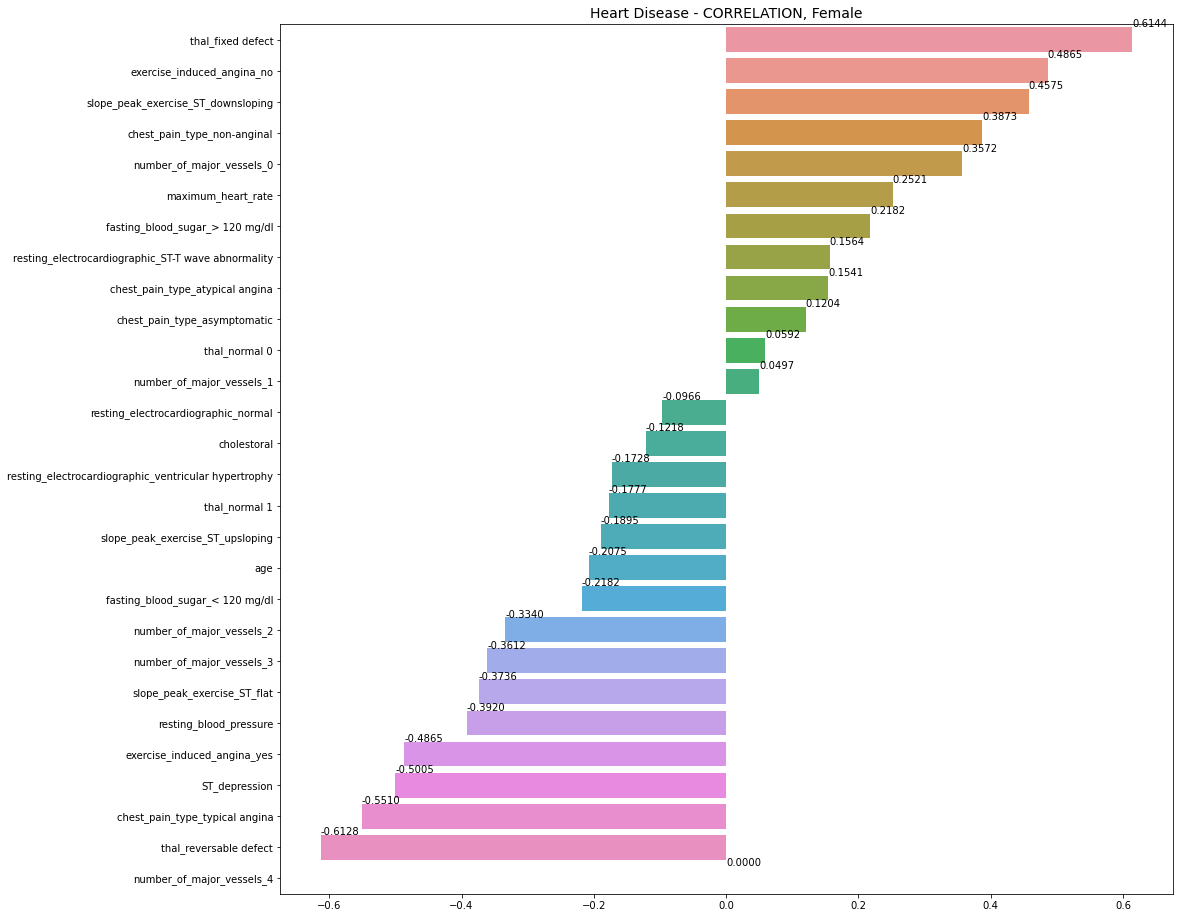

In [41]:
# for females
dataFemale = df[(df['sex_female'] == 1)]
dataFemaleCorr = dataFemale.drop(['sex_female','sex_male'], axis=1).corr()
dataFemaleCorr = dataFemaleCorr['target'].sort_values(ascending=False)
dataFemaleCorr['number_of_major_vessels_4'] = 0  # -7.9e-17  all numbers will be exp if not set to 0
dataFemaleCorr.to_frame()
dataFemaleCorr = dataFemaleCorr.drop(['target'])  # for barplot

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Female', fontsize=14)
ax = sns.barplot(y=dataFemaleCorr.index,x=dataFemaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()

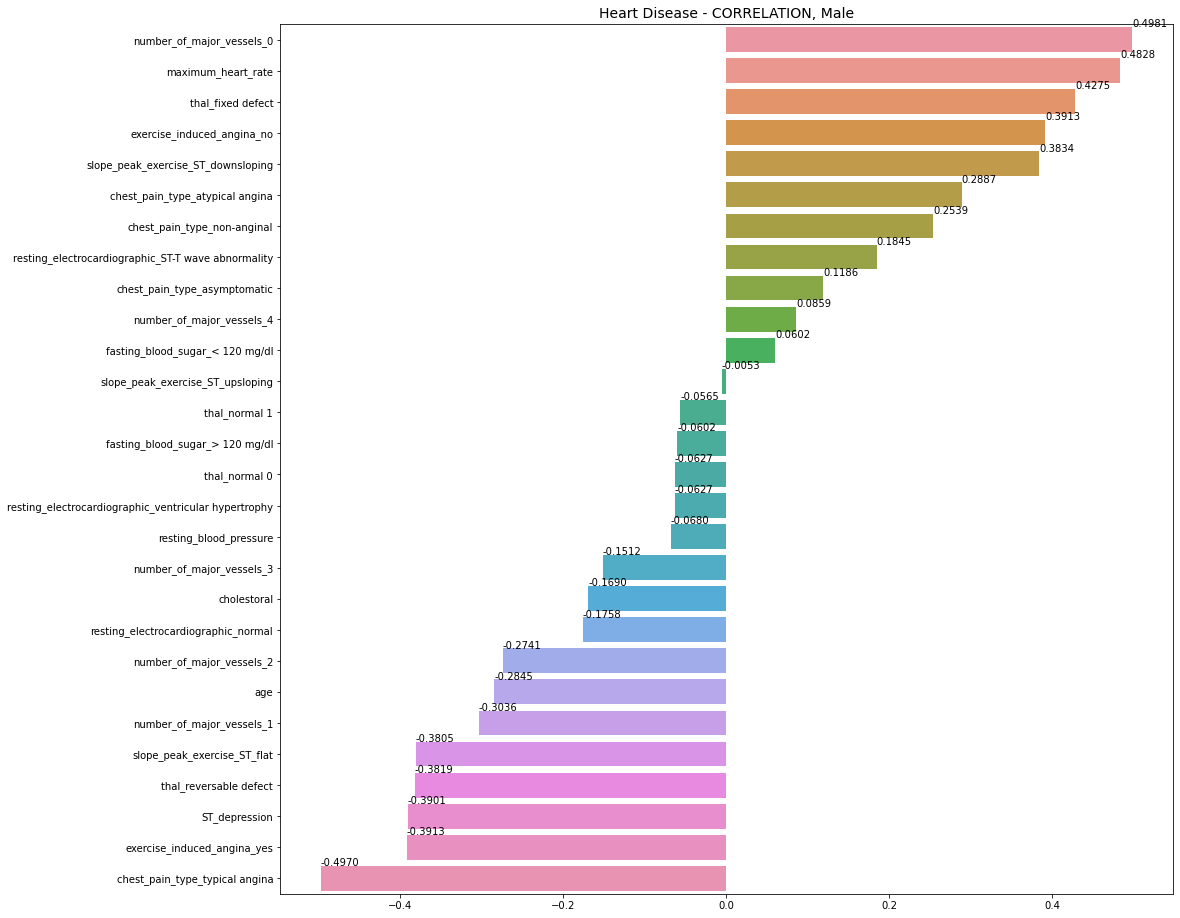

In [42]:
# for males
dataMale   = df[(df['sex_male'] == 1)]
dataMaleCorr = dataMale.drop(['sex_female','sex_male'], axis=1).corr()
dataMaleCorr = dataMaleCorr['target'].sort_values(ascending=False)
dataMaleCorr = dataMaleCorr.drop(['target'])

plt.figure(figsize=(16,16))
plt.title('Heart Disease - CORRELATION, Male', fontsize=14)
ax = sns.barplot(y=dataMaleCorr.index,x=dataMaleCorr.values)
for p in ax.patches:
    ax.annotate("%.4f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()))
plt.show()


##### Observations:
- **female:** thal fixed and reversable defect are major factors in heart disease, as well as angina type chest paints and ST_despression.
- **male:** number of vessels, angina type chest pains and maximum_heart_rate are major facotrs in heart disease.